<a href="https://colab.research.google.com/github/mlarunreddy/chennai-house-price-pridiction/blob/main/house_predicton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The aim of the project is to help customer predict home prices in chennai**

Importing Required Pacages

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import numpy as np
import matplotlib.pyplot as plt 
import io
from google.colab import files 

Loding The Dataset

In [3]:
uploaded_file=files.upload()


Saving train chennai sale.csv to train chennai sale.csv


In [5]:
df=pd.read_csv(io.BytesIO(uploaded_file['train chennai sale.csv']))

In [6]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [8]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


Checking Missing Values

In [9]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

**Data Cleaning**

In [10]:
df.drop_duplicates().shape

(7109, 22)

Missing Value Handeling

In [11]:
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0],inplace=True)
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0],inplace=True)
df.QS_OVERALL = df.QS_OVERALL.fillna(df.QS_OVERALL.mean())

In [12]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [13]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [14]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [15]:
nf=df.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1)

In [16]:
nf.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


Checking Data Types

In [17]:
nf.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

Changing To Proper Datatype

In [18]:
nf['N_BEDROOM']=nf['N_BEDROOM'].astype(int)
nf['N_BATHROOM']=nf['N_BATHROOM'].astype(int)

In [19]:
nf.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

In [20]:
df=nf

Creating Age of the building column based on the date sale and datebuild columns

In [21]:
df['AGE']=pd.DatetimeIndex(df['DATE_SALE']).year-pd.DatetimeIndex(df['DATE_BUILD']).year

In [22]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
AGE                int64
dtype: object

All the columns are changed to proper Datatype

In [23]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,13-03-2010,14,3,2,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


Describing the Numerical Value

In [24]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503254,1.089491e+07,24.276270
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.525440,3.768603e+06,12.334164
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,3.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06,14.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.503254,1.033505e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,1.299390e+07,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,55.000000


checking the Outliers

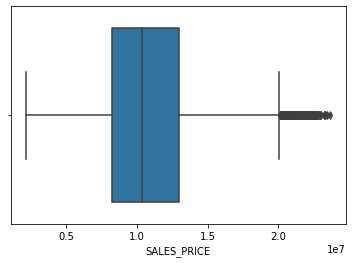

In [25]:
sns.boxplot(df['SALES_PRICE'])

In [26]:
nf.loc[nf['STREET']=='Pavad','STREET']='Paved'
nf.loc[nf['STREET']=='NOAccsess','STREET']='No Access'
nf["STREET"].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [27]:
st_s=nf.groupby('STREET')['SALES_PRICE'].mean()
st_s

STREET
Gravel       1.144462e+07
No Access    1.000672e+07
NoAccess     8.282289e+06
Pavd         1.097889e+07
Paved        1.105791e+07
Name: SALES_PRICE, dtype: float64

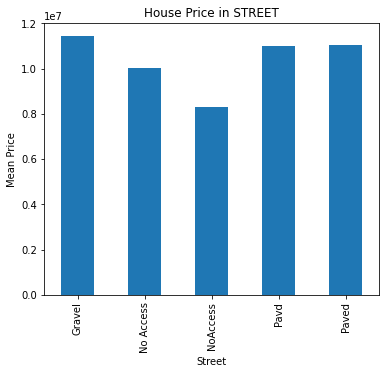

In [28]:
st_s.plot(kind='bar',title='House Price in STREET',ylabel='Mean Price',
          xlabel='Street',figsize=(6,5))

Findind  IQR

In [29]:
percentile25 =df['SALES_PRICE'].quantile(0.25)
percentile75 = df['SALES_PRICE'].quantile(0.75)
print("25th percentile of the data is",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR:",percentile75-percentile25)

25th percentile of the data is 8272100.0
75th percentile of the data is  12993900.0
IQR: 4721800.0


Calculating the MIN and MAX Limits

In [30]:
max_value=percentile75 + 1.5 * (percentile75-percentile25)
min_value=percentile25 - 1.5*(percentile75-percentile25)
print(max_value)
print(min_value)

20076600.0
1189400.0


Removing Outliers by using Capping Technique

In [31]:
df['SALES_PRICE']=np.where(
    df['SALES_PRICE']>max_value,
    max_value,
    np.where(
        df['SALES_PRICE']<min_value,
        min_value,
        df['SALES_PRICE']
                               
    )   
)
df['SALES_PRICE'].describe()


count    7.109000e+03
mean     1.085674e+07
std      3.664953e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.007660e+07
Name: SALES_PRICE, dtype: float64

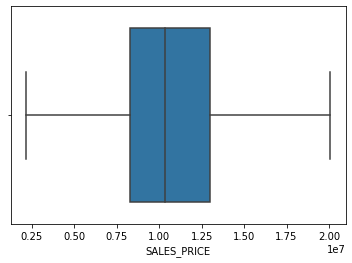

In [32]:
sns.boxplot(df['SALES_PRICE'])

In [33]:
print(df['AREA'].unique())
print(df['SALES_PRICE'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())
print(df['MZZONE'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
[ 7600000. 20076600. 13159200. ...  8351410.  8507000.  9976480.]
['Yes' 'No' 'Noo']
['Commercial' 'Others' 'Other' 'House' 'Comercial']
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [34]:
 df['AREA'].replace(['Karapakam'],'Karapakkam',inplace=True)
 df['AREA'].replace(['Ana Nagar','Ana Nagar','Ann Nagar'],'Anna Nagar',inplace=True)
 df['AREA'].replace(['Adyr'],'Adyar',inplace=True)
 df['AREA'].replace(['Velchery'],'Velachery',inplace=True)
 df['AREA'].replace(['Chrompet','Chrmpet','Chrompt'],'Chrompet',inplace=True)
 df['AREA'].replace(['KKNagar'],'KK Nagar',inplace=True)
 df['AREA'].replace(['TNagar'],'T Nagar',inplace=True)

 df['SALE_COND'].replace(['Ab Normal'],'Abnormal',inplace=True)
 df['SALE_COND'].replace(['PartiaLl','Partiall'],'Partial',inplace=True)
 df['SALE_COND'].replace(['Adj Land'],'Adjland',inplace=True)

 df['PARK_FACIL'].replace(['Noo'],'No',inplace=True)

 df['BUILDTYPE'].replace(['Others'],'Other',inplace=True)
 df['BUILDTYPE'].replace(['Comercial','commercial'],'commercial',inplace=True)
 
 df['UTILITY_AVAIL'].replace(['AllPub'],'All Pub',inplace=True)
 df['UTILITY_AVAIL'].replace(['NoSewr','NoSeWa'],'NoSewr',inplace=True)

df['STREET'].replace(['Pavd'],'Paved',inplace=True)
df['STREET'].replace(['NoAccess'],'No Access',inplace=True)

In [35]:
print(df['AREA'].unique())
print(df['SALES_PRICE'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())
print(df['MZZONE'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar' 'Chormpet']
[ 7600000. 20076600. 13159200. ...  8351410.  8507000.  9976480.]
['Yes' 'No']
['Commercial' 'Other' 'House' 'commercial']
['All Pub' 'ELO' 'NoSewr ' 'NoSewr']
['Paved' 'Gravel' 'No Access']
['A' 'RH' 'RL' 'I' 'C' 'RM']


After correcting all spelling mistakes in catagorical column,the above are the unique names.

In [36]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

Exploteory data analasis

EDA for Catagorical Columns

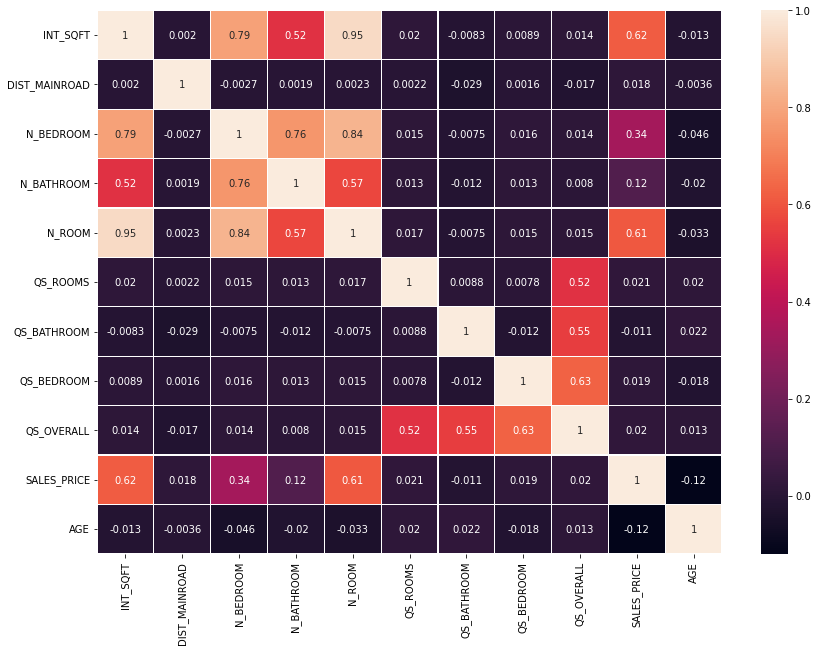

In [37]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.2)

SALES_PRICE is the target.so some features have strong co-relation with respect to sales price those are INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOMS.

Some features have weekest co-relation those are QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_ROOMS,QS_OVERALL

*Checking* relationship between the AREA feature and SALES_PRICE Target columns

In [38]:
area_order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

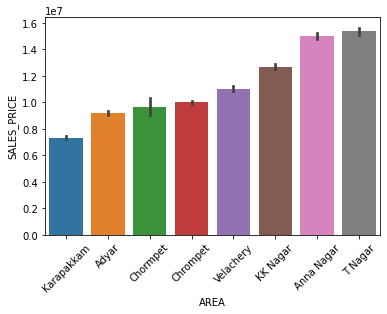

In [39]:
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=area_order)
plt.xticks(rotation=45) 

Anna Nagar and T Nagar are the area's with highest sale-price


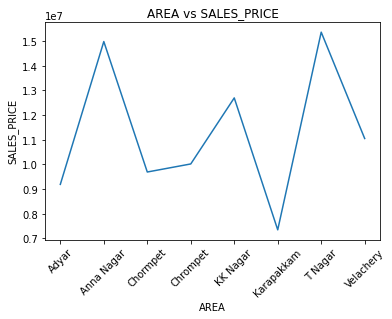

In [40]:
df.groupby('AREA')['SALES_PRICE'].mean().plot()
plt.title('AREA vs SALES_PRICE')
plt.xlabel('AREA')
plt.ylabel('SALES_PRICE')
plt.xticks(rotation=45)
plt.show()

Checking Relationship between SALES_COND and SALES_PRICE

In [41]:
sale_cond_order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']

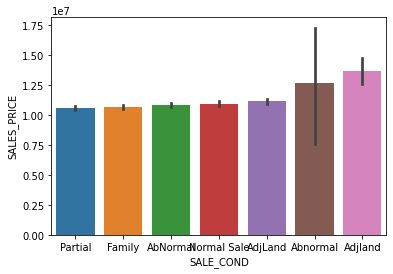

In [42]:
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df,order=sale_cond_order)

In SALE_COND there are slight variation

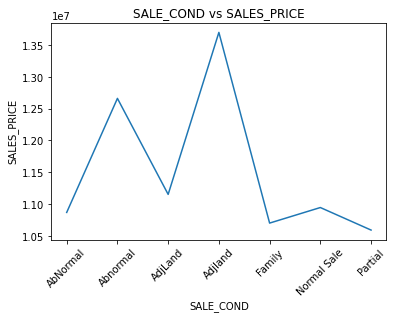

In [43]:
df.groupby('SALE_COND')['SALES_PRICE'].mean().plot()
plt.title('SALE_COND vs SALES_PRICE')
plt.xlabel('SALE_COND')
plt.ylabel('SALES_PRICE')
plt.xticks(rotation=45)
plt.show()

Checking Relationship between PARK_FACIL and SALES_PRICE

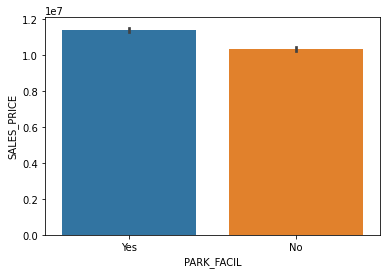

In [44]:
sns.barplot(x="PARK_FACIL",y='SALES_PRICE',data=df)



*Houses having Park Facility are more expencive than the house with no park facility



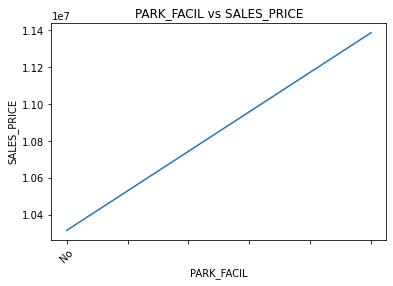

In [45]:
df.groupby('PARK_FACIL')['SALES_PRICE'].mean().plot()
plt.title('PARK_FACIL vs SALES_PRICE')
plt.xlabel('PARK_FACIL')
plt.ylabel('SALES_PRICE')
plt.xticks(rotation=45)
plt.show()

Checking Relationship between BUILDTYPE and SALES_PRICE

In [46]:
buildtype_order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE']

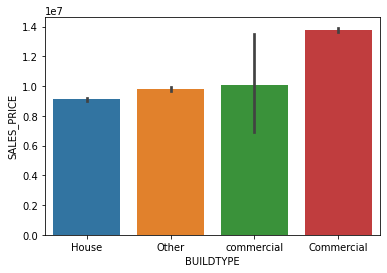

In [47]:
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=buildtype_order)

COMMERCIAL buildtypes more expensive compared to house and other

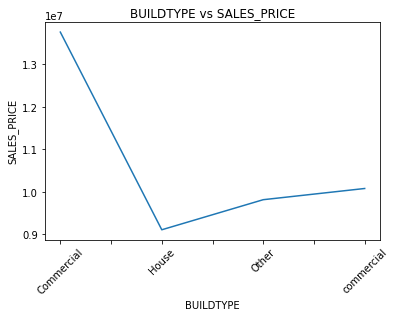

In [48]:
df.groupby('BUILDTYPE')['SALES_PRICE'].mean().plot()
plt.title('BUILDTYPE vs SALES_PRICE')
plt.xlabel('BUILDTYPE')
plt.ylabel('SALES_PRICE')
plt.xticks(rotation=45)
plt.show()

Checking Relationship between UTILITY_AVAIL and SALES_PRICE

In [49]:
utility_avail_order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']

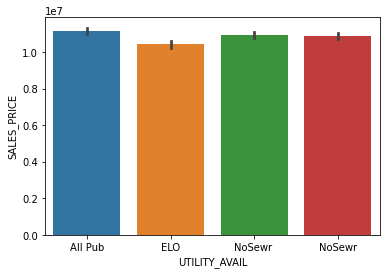

In [50]:
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df)

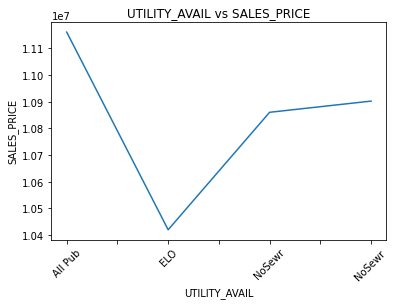

In [51]:
df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().plot()
plt.title('UTILITY_AVAIL vs SALES_PRICE')
plt.xlabel('UTILITY_AVAIL')
plt.ylabel('SALES_PRICE')
plt.xticks(rotation=45)
plt.show()

There is a good relationship between UTILITY_AVAIL and SALES_PRICE target.


Checking Relationship between STREET and SALES_PRICE

In [52]:
street_order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']

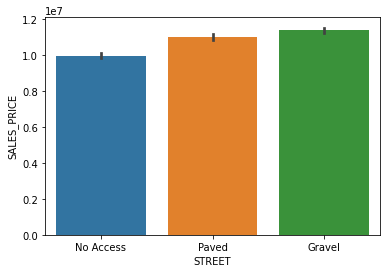

In [53]:
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=street_order)

GRAVEL STREET houde are more expensive than other street

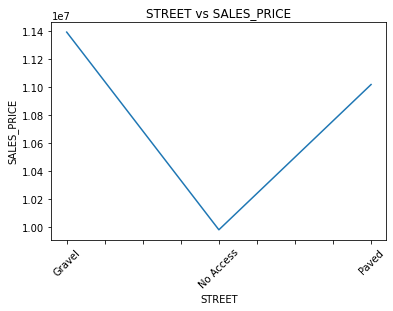

In [54]:
df.groupby('STREET')['SALES_PRICE'].mean().plot()
plt.title('STREET vs SALES_PRICE')
plt.xlabel('STREET')
plt.ylabel('SALES_PRICE')
plt.xticks(rotation=45)
plt.show()

Checking Relationship between MZZONE and SALES_PRICE

In [55]:
mzzone_order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']

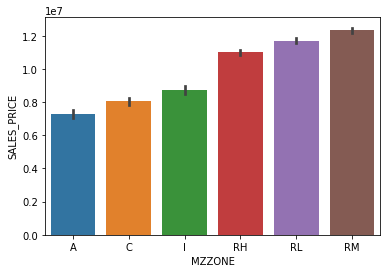

In [56]:
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=mzzone_order)

MZZONE with the values RM,RL,RH have higher sales_price than other values

Text(0.5, 1.0, 'MZZONE vs SALES_PRICE')

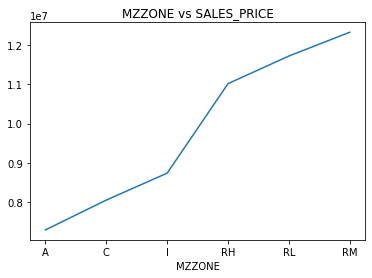

In [57]:
df.groupby('MZZONE')['SALES_PRICE'].mean().plot()
plt.title('MZZONE vs SALES_PRICE') 

Checking Relationship between N_BEDROOM  and SALES_PRICE

In [58]:
n_bedroom_order=df.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM']

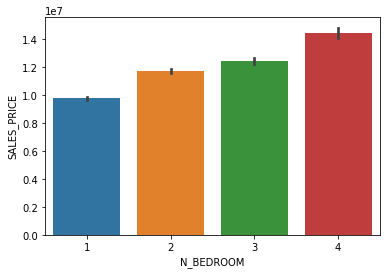

In [59]:
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df,order=n_bedroom_order)

the increse in bedroom, sales price also increses

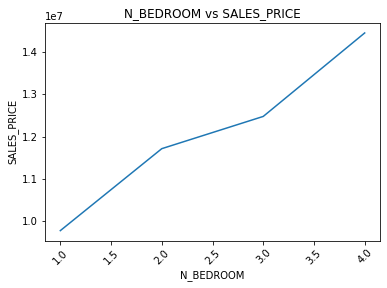

In [60]:
df.groupby('N_BEDROOM')['SALES_PRICE'].mean().plot()
plt.title('N_BEDROOM vs SALES_PRICE')
plt.xlabel('N_BEDROOM')
plt.ylabel('SALES_PRICE')
plt.xticks(rotation=45)
plt.show()

Checking Relationship between N_BATHROOM  and SALES_PRICE

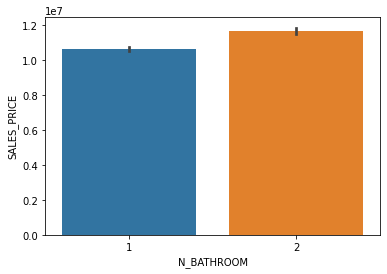

In [61]:
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=df)

THE increse in bathroom sales price also incerses

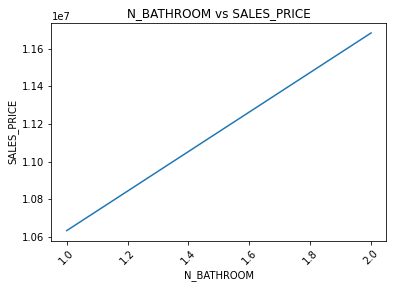

In [62]:
df.groupby('N_BATHROOM')['SALES_PRICE'].mean().plot()
plt.title('N_BATHROOM vs SALES_PRICE')
plt.xlabel('N_BATHROOM')
plt.ylabel('SALES_PRICE')
plt.xticks(rotation=45)
plt.show()

Checking Relationship between N_ROOM  and SALES_PRICE

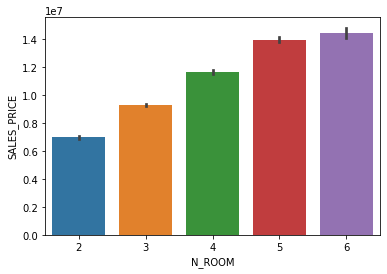

In [63]:
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=df)

The increse in number of rooms sales price also increses

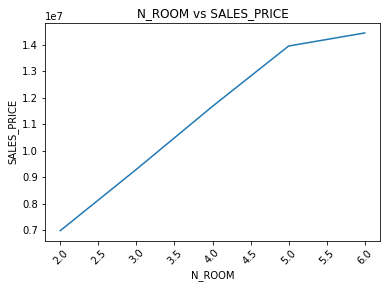

In [64]:
df.groupby('N_ROOM')['SALES_PRICE'].mean().plot()
plt.title('N_ROOM vs SALES_PRICE')
plt.xlabel('N_ROOM')
plt.ylabel('SALES_PRICE')
plt.xticks(rotation=45)
plt.show()

EDA for Numerical Columns

Checing linear relationship between the INT_SQFT and SALES_PRICE target columns

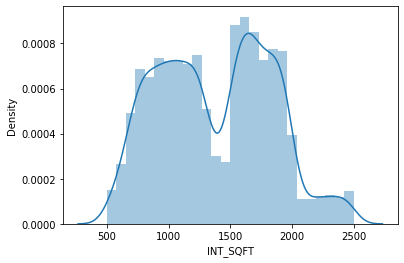

In [65]:
sns.distplot(df['INT_SQFT'])

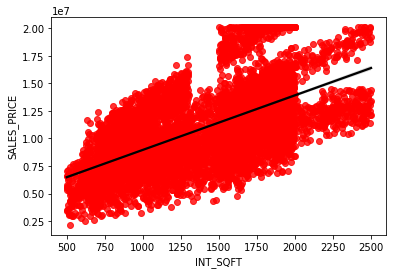

In [66]:
sns.regplot(x='INT_SQFT',y='SALES_PRICE',data=df,scatter_kws={'color':'red'},line_kws={'color':'black'})

There are strong relationship between the INT_SQFT feature and SALES_PRICE target columns


Checking Relationship between DIST_MAINROAD  and SALES_PRICE

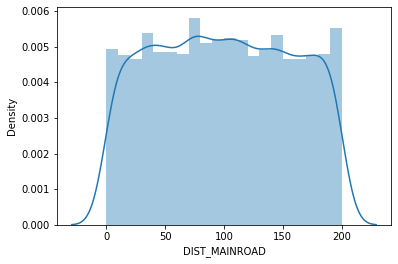

In [67]:
sns.distplot(df['DIST_MAINROAD'])

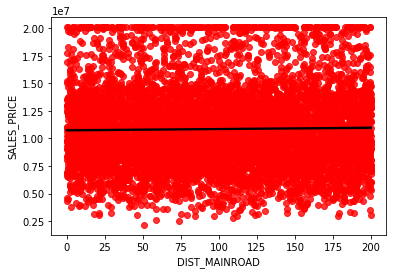

In [68]:
sns.regplot(x='DIST_MAINROAD',y='SALES_PRICE',data=df,scatter_kws={'color':'red'},line_kws={'color':'black'})

There is no relationship between the dist_mainroad and SALES_PRICE target columns
It is better to drop this feature

Checking Relationship betweenQS_ROOMS and SALES_PRICE





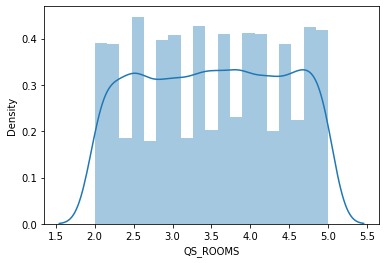

In [69]:
sns.distplot(df['QS_ROOMS'])

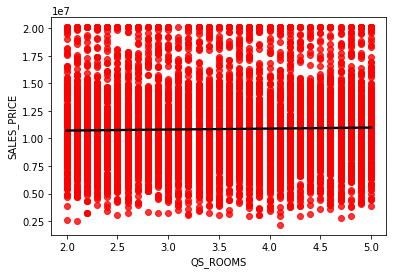

In [70]:
sns.regplot(x='QS_ROOMS',y='SALES_PRICE',data=df,scatter_kws={'color':'red'},line_kws={'color':'black'})

There is no relationship in between QS_ROOMS and SALES_PRICE target columns.

It is better to drop this feature

Checking Relationship between QS_BEDROOM  and SALES_PRICE

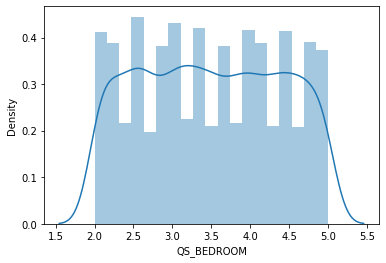

In [71]:
sns.distplot(df['QS_BEDROOM'])

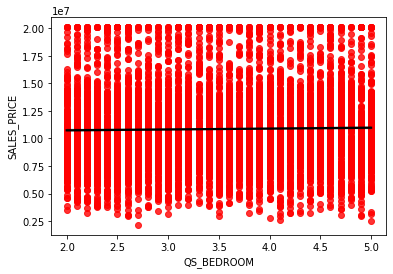

In [72]:
sns.regplot(x='QS_BEDROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'red'},line_kws={'color':'black'})

There is no relationship in between QS_BEDROOM and SALES_PRICE target columns.

It is better to drop this feature

Checking Relationship between QS_BATHROOM  and SALES_PRICE

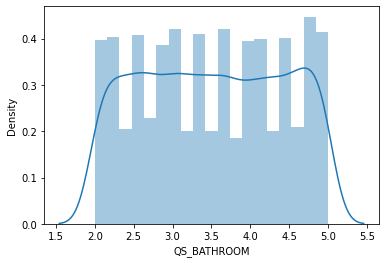

In [73]:
sns.distplot(df['QS_BATHROOM'])

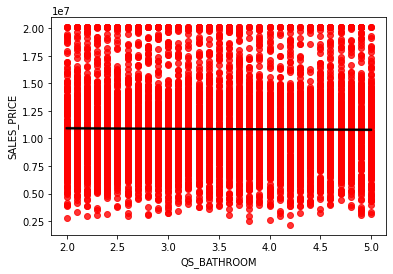

In [74]:
sns.regplot(x='QS_BATHROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'red'},line_kws={'color':'black'})

There is no relationship in between QS_BATHROOM and SALES_PRICE target columns.

It is better to drop this feature

Checking Relationship between QS_OVERALL  and SALES_PRICE

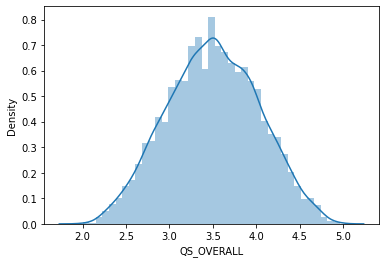

In [75]:
sns.distplot(df['QS_OVERALL'])

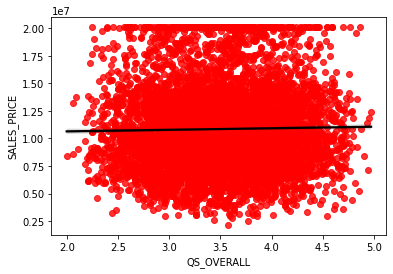

In [76]:
sns.regplot(x='QS_OVERALL',y='SALES_PRICE',data=df,scatter_kws={'color':'red'},line_kws={'color':'black'})

There is no relationship in between QS_BATHROOM and SALES_PRICE target columns.

It is better to drop this feature

Checking Relationship between AGE and SALES_PRICE

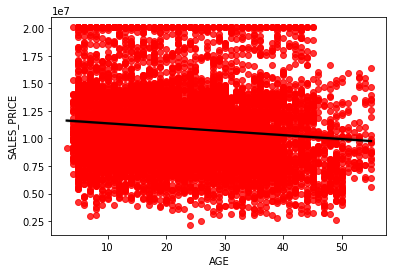

In [77]:
sns.regplot(x='AGE',y='SALES_PRICE',data=df,scatter_kws={'color':'red'},line_kws={'color':'black'})

There is a opposite relationship in between the AGE and SALES_PRICE target columns.
This feture will be usefull 

Insights From the Analasis

*  The distribution of the data in all the columns are normally distributed in some columns only the data is very slightly skewed.

*  INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOMS FEATUREShaving strong relationship with SALES_PRICE target.These features are very important to train this model.

*  DIST_MAINROAD,QS_ROOMS,QS_BEDROOM,QS_BATHROOMS,QS_OVERALL has no relationship with SALES_PRICE target,so,we will dropall these features






In [78]:
df.drop(['QS_OVERALL','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','DIST_MAINROAD','DATE_BUILD','DATE_SALE','SALE_COND'],axis=1,inplace=True)

In [79]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE
0,Karapakkam,1004,1,1,3,Yes,Commercial,All Pub,Paved,A,7600000.0,44
1,Anna Nagar,1986,2,1,5,No,Commercial,All Pub,Gravel,RH,20076600.0,11
2,Adyar,909,1,1,3,Yes,Commercial,ELO,Gravel,RL,13159200.0,20
3,Velachery,1855,3,2,5,No,Other,NoSewr,Paved,I,9630290.0,22
4,Karapakkam,1226,1,1,3,Yes,Other,All Pub,Gravel,C,7406250.0,30


Encoding the data

Label Encoding for binary class data


In [80]:
df.PARK_FACIL=df.PARK_FACIL.map({'Yes':1,'No':0})

One-Hot Encoding for Multi-Class Nominal data

In [81]:
df=pd.get_dummies(df,columns=["BUILDTYPE","AREA","UTILITY_AVAIL","STREET","MZZONE"])
df.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,1,1,3,1,7600000.0,44,1,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1986,2,1,5,0,20076600.0,11,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,909,1,1,3,1,13159200.0,20,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1855,3,2,5,0,9630290.0,22,0,0,1,...,1,0,0,1,0,0,1,0,0,0
4,1226,1,1,3,1,7406250.0,30,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [82]:
df.dtypes

INT_SQFT                   int64
N_BEDROOM                  int64
N_BATHROOM                 int64
N_ROOM                     int64
PARK_FACIL                 int64
SALES_PRICE              float64
AGE                        int64
BUILDTYPE_Commercial       uint8
BUILDTYPE_House            uint8
BUILDTYPE_Other            uint8
BUILDTYPE_commercial       uint8
AREA_Adyar                 uint8
AREA_Anna Nagar            uint8
AREA_Chormpet              uint8
AREA_Chrompet              uint8
AREA_KK Nagar              uint8
AREA_Karapakkam            uint8
AREA_T Nagar               uint8
AREA_Velachery             uint8
UTILITY_AVAIL_All Pub      uint8
UTILITY_AVAIL_ELO          uint8
UTILITY_AVAIL_NoSewr       uint8
UTILITY_AVAIL_NoSewr       uint8
STREET_Gravel              uint8
STREET_No Access           uint8
STREET_Paved               uint8
MZZONE_A                   uint8
MZZONE_C                   uint8
MZZONE_I                   uint8
MZZONE_RH                  uint8
MZZONE_RL 

In [83]:
df['SALES_PRICE']=df['SALES_PRICE'].astype(int)

In [84]:
df.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,1,1,3,1,7600000,44,1,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1986,2,1,5,0,20076600,11,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,909,1,1,3,1,13159200,20,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1855,3,2,5,0,9630290,22,0,0,1,...,1,0,0,1,0,0,1,0,0,0
4,1226,1,1,3,1,7406250,30,0,0,1,...,0,1,0,0,0,1,0,0,0,0


Linear Reggresion Model

In [85]:
x=df.drop('SALES_PRICE',axis=1).values
y=df['SALES_PRICE'].values

Splitting

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Scalling

In [87]:
scalar=StandardScaler()
scalar.fit(x_train,y_train)
x_train_scaled=scalar.transform(x_train)
x_test_scaled=scalar.transform(x_test)

Model Fitting

In [88]:
regressor = LinearRegression()
regressor.fit(x_train_scaled,y_train)

LinearRegression()

Predicting Values

In [89]:
y_pred= regressor.predict(x_test_scaled)
y_pred

array([11192532.26408096,  8451092.26408096,  9026612.26408096, ...,
        7939316.26408096,  8128308.26408096, 13930644.26408096])

Evaluvation Metric-R2 Value

In [90]:
print('R2-SCORE:',metrics.r2_score(y_test,y_pred))

R2-SCORE: 0.9606360507771413


K Nearest Neighbbhour Algorithm(kNN)

hyper parameter tunning,fitting the model

In [91]:
for i in [1,2,3,4,5,6,7,8,9,10,20,30]:
  knn=KNeighborsRegressor(i)
  knn.fit(x_train_scaled,y_train)
  print("k value :",i,"train score :",knn.score(x_train_scaled,y_train))

k value : 1 train score : 0.999999844193583
k value : 2 train score : 0.9753398024613028
k value : 3 train score : 0.9602112832845259
k value : 4 train score : 0.9500107899048014
k value : 5 train score : 0.9443899637849271
k value : 6 train score : 0.9395981913505612
k value : 7 train score : 0.936799746557433
k value : 8 train score : 0.9332678242711039
k value : 9 train score : 0.9304456856667315
k value : 10 train score : 0.9274766286694353
k value : 20 train score : 0.9078786185109429
k value : 30 train score : 0.8988776442925556


Desicion Tree Regressor Algorithm

Fitting the model

In [92]:
dt=DecisionTreeRegressor()
dt.fit(x_train_scaled,y_train)


DecisionTreeRegressor()

Predicted values

In [93]:
y_pred=dt.predict(x_test_scaled)
y_pred

array([10288980.,  5766000.,  8102500., ...,  8604850.,  7014500.,
       12968400.])

Evaluation metric-R2 Score

In [94]:
print('R2-SCORE:',r2_score(y_test,y_pred))

R2-SCORE: 0.972172588308633


Random forest Reggressor Algorithm

Fitting the Model 

In [98]:
rf=RandomForestRegressor(n_estimators=10)
rf.fit(x_train_scaled, y_train)

RandomForestRegressor(n_estimators=10)

predcting values

In [99]:
y_pred=rf.predict(x_test_scaled)
y_pred

array([10786904. ,  6737975. ,  8050175. , ...,  8847860.5,  8212087.5,
       12953744. ])

Evaluvation Metric-R2 Score

In [101]:
print('R2-SCORE:',r2_score(y_test,y_pred))

R2-SCORE: 0.985206938972292


In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf=RandomForestRegressor(n_estimators=100,max_depth=4,max_features='sqrt')
rf.fit(x_train_scaled,y_train)
y_pred=rf.predict(x_test_scaled)

In [106]:
print('R2- SCORE:',r2_score(y_test,y_pred))

R2- SCORE: 0.8034116795737705


XG Boost Algorithm

tunning based on the learning rate,fitting the model

In [110]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model=xgb.XGBRegressor(learning_rate=lr,n_estimators=100,verbosity=0)
  model.fit(x_train_scaled,y_train)
  model.score(x_test_scaled,y_test)
  print("Learning rate :",lr,"Train score:",model.score(x_train_scaled,y_train),"cross-Val score :",np.mean(cross_val_score(model,x_train_scaled,y_train)))

Learning rate : 0.01 Train score: -0.4943669644471491 cross-Val score : -0.5023478561189402
Learning rate : 0.02 Train score: 0.7031240611918662 cross-Val score : 0.6987923606362703
Learning rate : 0.03 Train score: 0.9032549808765646 cross-Val score : 0.899772358288806
Learning rate : 0.04 Train score: 0.9500106574430711 cross-Val score : 0.9464536000387284
Learning rate : 0.05 Train score: 0.9664710908953118 cross-Val score : 0.9632461431548835
Learning rate : 0.06 Train score: 0.9750023429022974 cross-Val score : 0.9724667044185523
Learning rate : 0.07 Train score: 0.9801877588178979 cross-Val score : 0.9779180721288308
Learning rate : 0.08 Train score: 0.9834854991710577 cross-Val score : 0.9806438301971616
Learning rate : 0.09 Train score: 0.9852958792214168 cross-Val score : 0.9836387797425479
Learning rate : 0.1 Train score: 0.9873900989247855 cross-Val score : 0.9855574912452024
Learning rate : 0.11 Train score: 0.9888891163432446 cross-Val score : 0.9869839928670661
Learning r

Evaluvation Metric R2-Score

In [112]:
model=xgb.XGBRegressor(learning_rate=0.7,n_estimators=100)
model.fit(x_train_scaled,y_train)
model.score(x_test_scaled,y_test)

[07:01:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9918102044510456

R2 Score of all Models

Linear REgression-0.96
K Nearest Neighbours-0.97
Random Regressor Algorithm-0.98
XG Boost algorithm-0.99